# THE SPARKS FOUNDATION (TSF - GRIP)

# ABHISHEK GARG
## Task 2: Predict the optimum number of Clusters and represent visually on 'Iris' dataset
## Dataset: https://bit.ly/3kXTdox

## Importing all the required libraries and Packages

In [1]:
import pandas as pd                  #Import the Pandas package
import numpy as np                   #Import the Numpy library
import matplotlib.pyplot as plt      #import matplotlib library
%matplotlib inline
from sklearn.cluster import KMeans   #Import the KMeans from sklearn library
import seaborn as sns                #for plotting different plots

## Importing the dataset

In [2]:
df=pd.read_csv("iris.csv") #Import the iris database

In [3]:
df.head()                # Printing first few(5) rows of dataset 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Check for any missing value in dataset

In [4]:
df.isnull().sum()          

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Label Encoder to encode names of Species into discrete numerical values

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Species = le.fit_transform(df.Species)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Data Visualisation using scatter plot

### SepalLengthCm vs SepalWidthCm

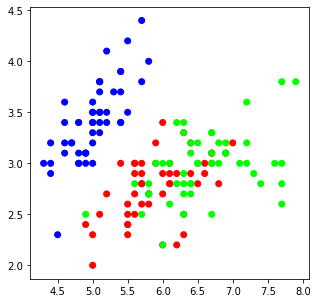

In [7]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['Species'],cmap='brg')
plt.show()

### PetalLengthCm vs PetalWidthCm

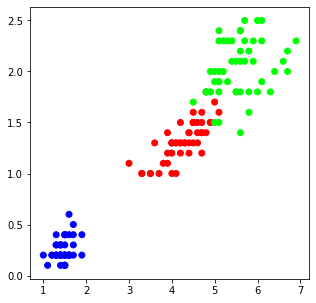

In [8]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df['Species'],cmap='brg')
plt.show()

## Standard Scaler to scale down all the unscaled values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=df.iloc[:,1:5].copy()
df_scaled[df_scaled.columns]=scaler.fit_transform(df_scaled)

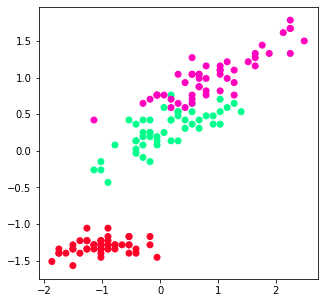

In [10]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df_scaled['SepalLengthCm'],df_scaled['PetalLengthCm'],c=df['Species'],cmap='gist_rainbow')

## KMeans Clustering Algorithm

In [11]:
model=KMeans(n_clusters=3,max_iter=300)
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
y_predicted=model.predict(df_scaled)

## Prediction of values

In [13]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Finding the optimum number of clusters for k-means classification

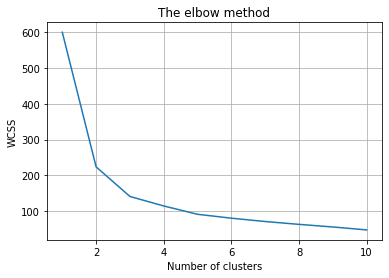

In [14]:
x = df_scaled.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

## Applying kmeans to the dataset / Creating the kmeans classifier

In [15]:
kmeans = KMeans(n_clusters = 3,max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters - On the first two columns
## Plotting the centroids of the cluster

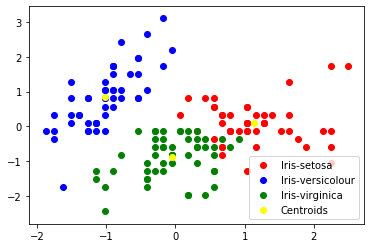

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],c = 'yellow', label = 'Centroids')
plt.legend()